In [128]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [129]:
df = pd.read_csv(r"C:\Users\Shaaf\Desktop\Data Science\Practice Projects\Amazon Demand Forecasting\Data\Historical Product Demand.csv")

In [130]:
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [131]:
df.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [132]:
df.sort_values(by='Date',ascending=True)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011/1/8,2
131429,Product_0412,Whse_S,Category_007,2011/10/20,(2)
131426,Product_0125,Whse_S,Category_011,2011/10/20,(2)
75193,Product_0642,Whse_C,Category_019,2011/10/31,3
131026,Product_2137,Whse_S,Category_009,2011/11/18,(25)
...,...,...,...,...,...
995790,Product_1464,Whse_A,Category_019,NaN,(900)
995791,Product_1541,Whse_A,Category_019,NaN,(200)
995792,Product_1388,Whse_A,Category_019,NaN,(300)
995793,Product_1541,Whse_A,Category_019,NaN,(300)


<Axes: xlabel='Date', ylabel='Count'>

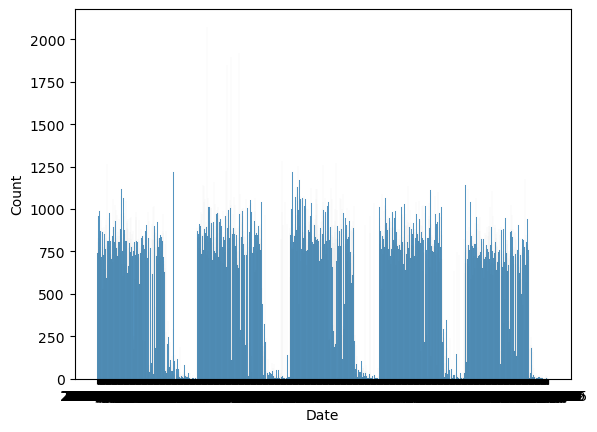

In [133]:
sns.histplot(df['Date'], bins=30)

In [134]:
df[df['Date'].isna()]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
45460,Product_1461,Whse_A,Category_019,NaN,10000
456373,Product_1636,Whse_A,Category_019,NaN,100
456374,Product_1461,Whse_A,Category_019,NaN,300
456375,Product_1464,Whse_A,Category_019,NaN,300
456376,Product_1388,Whse_A,Category_019,NaN,200
...,...,...,...,...,...
995790,Product_1464,Whse_A,Category_019,NaN,(900)
995791,Product_1541,Whse_A,Category_019,NaN,(200)
995792,Product_1388,Whse_A,Category_019,NaN,(300)
995793,Product_1541,Whse_A,Category_019,NaN,(300)


In [135]:
df['Product_Category'].unique()

array(['Category_028', 'Category_006', 'Category_001', 'Category_019',
       'Category_005', 'Category_030', 'Category_032', 'Category_011',
       'Category_033', 'Category_007', 'Category_015', 'Category_021',
       'Category_024', 'Category_026', 'Category_023', 'Category_022',
       'Category_009', 'Category_003', 'Category_004', 'Category_018',
       'Category_020', 'Category_013', 'Category_008', 'Category_017',
       'Category_031', 'Category_025', 'Category_010', 'Category_029',
       'Category_012', 'Category_002', 'Category_014', 'Category_027',
       'Category_016'], dtype=object)

In [136]:
df['Product_Category'].value_counts()

Product_Category
Category_019    481099
Category_005    101671
Category_001     97787
Category_007     82402
Category_021     52011
Category_006     35577
Category_028     31302
Category_011     23208
Category_015     22954
Category_024     20885
Category_009     19738
Category_026     14803
Category_030     12997
Category_032      9296
Category_022      8657
Category_023      7899
Category_018      5239
Category_003      4189
Category_013      3743
Category_020      3490
Category_031      2280
Category_033      1849
Category_008      1560
Category_012      1147
Category_010       976
Category_029       671
Category_017       615
Category_004       329
Category_002        77
Category_016        37
Category_025        35
Category_014        26
Category_027        26
Name: count, dtype: int64

In [137]:
df.dropna(inplace=True,axis=0)

In [138]:
df.reset_index(inplace=True)

In [139]:
df.drop(columns=['index'], inplace=True)

In [140]:
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1037331,Product_1791,Whse_J,Category_006,2016/4/27,1000
1037332,Product_1974,Whse_J,Category_006,2016/4/27,1
1037333,Product_1787,Whse_J,Category_006,2016/4/28,2500
1037334,Product_0901,Whse_J,Category_023,2016/10/7,50


In [141]:
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

In [142]:
df['Date']=pd.to_datetime(df['Date'])

In [143]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.dayofweek
df['Week'] = df['Date'].dt.isocalendar().week
df['Is_Weekend'] = df['Weekday'].isin([5, 6]).astype(int)


In [144]:
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day,Weekday,Week,Is_Weekend
0,Product_0993,Whse_J,Category_028,2012-07-27,100,2012,7,27,4,30,0
1,Product_0979,Whse_J,Category_028,2012-01-19,500,2012,1,19,3,3,0
2,Product_0979,Whse_J,Category_028,2012-02-03,500,2012,2,3,4,5,0
3,Product_0979,Whse_J,Category_028,2012-02-09,500,2012,2,9,3,6,0
4,Product_0979,Whse_J,Category_028,2012-03-02,500,2012,3,2,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...
1037331,Product_1791,Whse_J,Category_006,2016-04-27,1000,2016,4,27,2,17,0
1037332,Product_1974,Whse_J,Category_006,2016-04-27,1,2016,4,27,2,17,0
1037333,Product_1787,Whse_J,Category_006,2016-04-28,2500,2016,4,28,3,17,0
1037334,Product_0901,Whse_J,Category_023,2016-10-07,50,2016,10,7,4,40,0


In [145]:
df = df.sort_values(by=['Product_Code', 'Date'])


In [146]:
df.drop(columns=['Date'], inplace=True)

In [147]:
df

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day,Weekday,Week,Is_Weekend
47144,Product_0001,Whse_J,Category_005,200,2011,12,16,4,50,0
47145,Product_0001,Whse_J,Category_005,100,2011,12,20,1,51,0
72174,Product_0001,Whse_A,Category_005,200,2012,1,3,1,1,0
72175,Product_0001,Whse_A,Category_005,800,2012,1,3,1,1,0
111525,Product_0001,Whse_A,Category_005,200,2012,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...
962195,Product_2172,Whse_J,Category_005,100,2016,9,30,4,39,0
899618,Product_2172,Whse_J,Category_005,600,2016,10,21,4,42,0
899583,Product_2172,Whse_J,Category_005,300,2016,10,30,6,43,1
899610,Product_2172,Whse_J,Category_005,300,2016,11,24,3,47,0


In [148]:
df.reset_index(drop=True, inplace=True)

In [149]:
df

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day,Weekday,Week,Is_Weekend
0,Product_0001,Whse_J,Category_005,200,2011,12,16,4,50,0
1,Product_0001,Whse_J,Category_005,100,2011,12,20,1,51,0
2,Product_0001,Whse_A,Category_005,200,2012,1,3,1,1,0
3,Product_0001,Whse_A,Category_005,800,2012,1,3,1,1,0
4,Product_0001,Whse_A,Category_005,200,2012,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...
1037331,Product_2172,Whse_J,Category_005,100,2016,9,30,4,39,0
1037332,Product_2172,Whse_J,Category_005,600,2016,10,21,4,42,0
1037333,Product_2172,Whse_J,Category_005,300,2016,10,30,6,43,1
1037334,Product_2172,Whse_J,Category_005,300,2016,11,24,3,47,0


In [150]:
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'], errors='coerce').astype('Int64')

In [151]:
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Order_Demand         Int64
Year                 int32
Month                int32
Day                  int32
Weekday              int32
Week                UInt32
Is_Weekend           int32
dtype: object

In [152]:
df_cat = df.select_dtypes(exclude=[np.number])

In [153]:
df_cat

,Product_Code,Warehouse,Product_Category
0,Product_0001,Whse_J,Category_005
1,Product_0001,Whse_J,Category_005
2,Product_0001,Whse_A,Category_005
3,Product_0001,Whse_A,Category_005
4,Product_0001,Whse_A,Category_005
...,...,...,...
1037331,Product_2172,Whse_J,Category_005
1037332,Product_2172,Whse_J,Category_005
1037333,Product_2172,Whse_J,Category_005
1037334,Product_2172,Whse_J,Category_005


In [154]:
col = df_cat.columns
for i in col:
    df_cat[i] = LabelEncoder().fit_transform(df_cat[i])
    

In [155]:
df_cat

,Product_Code,Warehouse,Product_Category
0,0,2,4
1,0,2,4
2,0,0,4
3,0,0,4
4,0,0,4
...,...,...,...
1037331,2159,2,4
1037332,2159,2,4
1037333,2159,2,4
1037334,2159,2,4


In [185]:
df_encoded = pd.concat([df_cat,df.select_dtypes(include=[np.number])], axis=1)

In [186]:
df_encoded

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day,Weekday,Week,Is_Weekend
0,0,2,4,200,2011,12,16,4,50,0
1,0,2,4,100,2011,12,20,1,51,0
2,0,0,4,200,2012,1,3,1,1,0
3,0,0,4,800,2012,1,3,1,1,0
4,0,0,4,200,2012,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...
1037331,2159,2,4,100,2016,9,30,4,39,0
1037332,2159,2,4,600,2016,10,21,4,42,0
1037333,2159,2,4,300,2016,10,30,6,43,1
1037334,2159,2,4,300,2016,11,24,3,47,0


In [187]:
df_encoded.dropna(subset=['Order_Demand'], inplace=True)

In [188]:
features = df_encoded.drop('Order_Demand',axis=1)

In [189]:
features

,Product_Code,Warehouse,Product_Category,Year,Month,Day,Weekday,Week,Is_Weekend
0,0,2,4,2011,12,16,4,50,0
1,0,2,4,2011,12,20,1,51,0
2,0,0,4,2012,1,3,1,1,0
3,0,0,4,2012,1,3,1,1,0
4,0,0,4,2012,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...
1037331,2159,2,4,2016,9,30,4,39,0
1037332,2159,2,4,2016,10,21,4,42,0
1037333,2159,2,4,2016,10,30,6,43,1
1037334,2159,2,4,2016,11,24,3,47,0


In [190]:
target = df_encoded['Order_Demand']

In [191]:
target

0          200
1          100
2          200
3          800
4          200
          ... 
1037331    100
1037332    600
1037333    300
1037334    300
1037335    600
Name: Order_Demand, Length: 1031437, dtype: Int64

In [192]:
df_encoded=pd.DataFrame(StandardScaler().fit_transform(features),columns=features.columns)

In [193]:
df_encoded

,Product_Code,Warehouse,Product_Category,Year,Month,Day,Weekday,Week,Is_Weekend
0,-1.939002,0.290184,-1.244778,-2.132460,1.593428,0.048645,1.372276,1.553865,-0.091770
1,-1.939002,0.290184,-1.244778,-2.132460,1.593428,0.503115,-0.710030,1.620540,-0.091770
2,-1.939002,-2.252140,-1.244778,-1.412511,-1.598196,-1.428381,-0.710030,-1.713245,-0.091770
3,-1.939002,-2.252140,-1.244778,-1.412511,-1.598196,-1.428381,-0.710030,-1.713245,-0.091770
4,-1.939002,-2.252140,-1.244778,-1.412511,-1.598196,-1.314764,-0.015928,-1.713245,-0.091770
...,...,...,...,...,...,...,...,...,...
1031432,1.841906,0.290184,-1.244778,1.467289,0.722985,1.639289,1.372276,0.820432,-0.091770
1031433,1.841906,0.290184,-1.244778,1.467289,1.013133,0.616732,1.372276,1.020459,-0.091770
1031434,1.841906,0.290184,-1.244778,1.467289,1.013133,1.639289,2.760481,1.087135,10.896771
1031435,1.841906,0.290184,-1.244778,1.467289,1.303280,0.957584,0.678174,1.353838,-0.091770


In [ ]:
# sns.pairplot(df_encoded)

<Axes: >

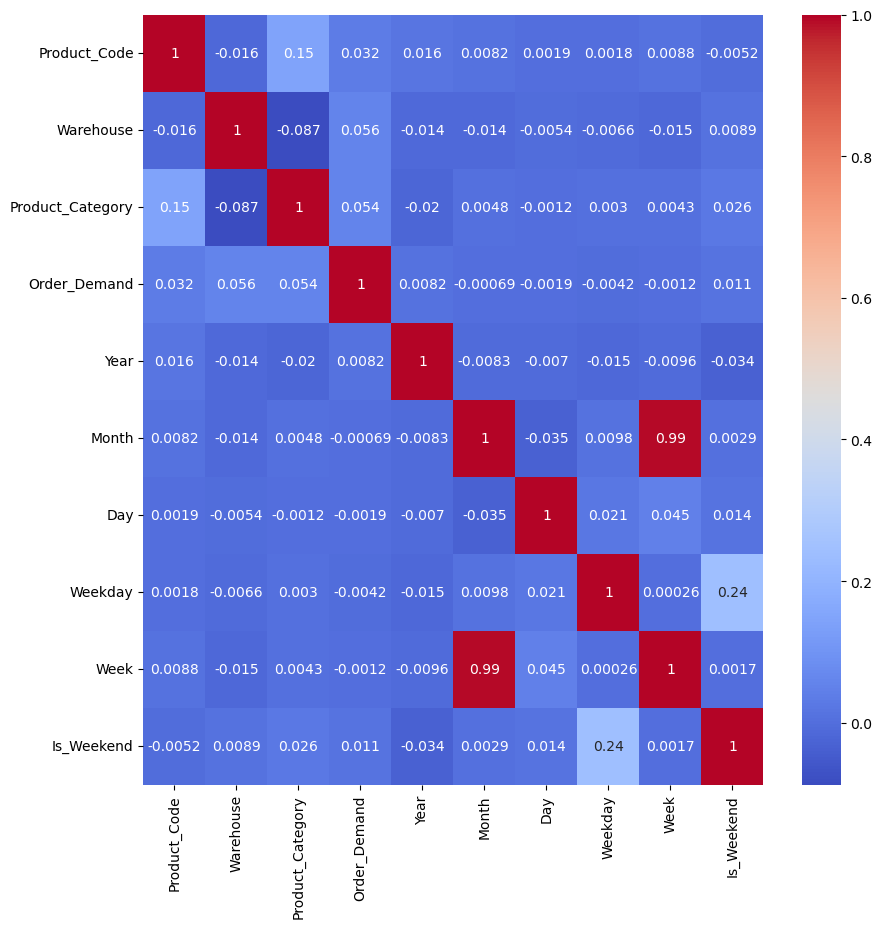

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_encoded.corr(),annot=True, cmap='coolwarm')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Product_Code'),
  Text(1, 0, 'Warehouse'),
  Text(2, 0, 'Product_Category'),
  Text(3, 0, 'Order_Demand'),
  Text(4, 0, 'Year'),
  Text(5, 0, 'Month'),
  Text(6, 0, 'Day'),
  Text(7, 0, 'Weekday'),
  Text(8, 0, 'Week'),
  Text(9, 0, 'Is_Weekend')])

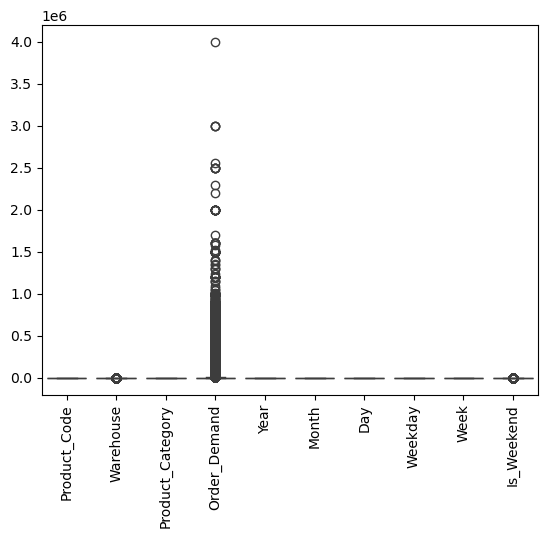

In [ ]:
sns.boxplot(df_encoded)
plt.xticks(rotation=90)

In [194]:
features

,Product_Code,Warehouse,Product_Category,Year,Month,Day,Weekday,Week,Is_Weekend
0,0,2,4,2011,12,16,4,50,0
1,0,2,4,2011,12,20,1,51,0
2,0,0,4,2012,1,3,1,1,0
3,0,0,4,2012,1,3,1,1,0
4,0,0,4,2012,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...
1037331,2159,2,4,2016,9,30,4,39,0
1037332,2159,2,4,2016,10,21,4,42,0
1037333,2159,2,4,2016,10,30,6,43,1
1037334,2159,2,4,2016,11,24,3,47,0


In [195]:
target=pd.DataFrame(target)

In [196]:
target

,Order_Demand
0,200
1,100
2,200
3,800
4,200
...,...
1037331,100
1037332,600
1037333,300
1037334,300


In [200]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031437 entries, 0 to 1037335
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1031437 non-null  int32 
 1   Warehouse         1031437 non-null  int32 
 2   Product_Category  1031437 non-null  int32 
 3   Year              1031437 non-null  int32 
 4   Month             1031437 non-null  int32 
 5   Day               1031437 non-null  int32 
 6   Weekday           1031437 non-null  int32 
 7   Week              1031437 non-null  UInt32
 8   Is_Weekend        1031437 non-null  int32 
dtypes: UInt32(1), int32(8)
memory usage: 44.3 MB


In [198]:
target.isnull().sum()

Order_Demand    0
dtype: int64

In [181]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037336 entries, 0 to 1037335
Data columns (total 1 columns):
 #   Column        Non-Null Count    Dtype
---  ------        --------------    -----
 0   Order_Demand  1031437 non-null  Int64
dtypes: Int64(1)
memory usage: 8.9 MB


In [201]:
features

,Product_Code,Warehouse,Product_Category,Year,Month,Day,Weekday,Week,Is_Weekend
0,0,2,4,2011,12,16,4,50,0
1,0,2,4,2011,12,20,1,51,0
2,0,0,4,2012,1,3,1,1,0
3,0,0,4,2012,1,3,1,1,0
4,0,0,4,2012,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...
1037331,2159,2,4,2016,9,30,4,39,0
1037332,2159,2,4,2016,10,21,4,42,0
1037333,2159,2,4,2016,10,30,6,43,1
1037334,2159,2,4,2016,11,24,3,47,0


In [202]:
features=pd.DataFrame(StandardScaler().fit_transform(features),columns=features.columns)

In [203]:
features

,Product_Code,Warehouse,Product_Category,Year,Month,Day,Weekday,Week,Is_Weekend
0,-1.939002,0.290184,-1.244778,-2.132460,1.593428,0.048645,1.372276,1.553865,-0.091770
1,-1.939002,0.290184,-1.244778,-2.132460,1.593428,0.503115,-0.710030,1.620540,-0.091770
2,-1.939002,-2.252140,-1.244778,-1.412511,-1.598196,-1.428381,-0.710030,-1.713245,-0.091770
3,-1.939002,-2.252140,-1.244778,-1.412511,-1.598196,-1.428381,-0.710030,-1.713245,-0.091770
4,-1.939002,-2.252140,-1.244778,-1.412511,-1.598196,-1.314764,-0.015928,-1.713245,-0.091770
...,...,...,...,...,...,...,...,...,...
1031432,1.841906,0.290184,-1.244778,1.467289,0.722985,1.639289,1.372276,0.820432,-0.091770
1031433,1.841906,0.290184,-1.244778,1.467289,1.013133,0.616732,1.372276,1.020459,-0.091770
1031434,1.841906,0.290184,-1.244778,1.467289,1.013133,1.639289,2.760481,1.087135,10.896771
1031435,1.841906,0.290184,-1.244778,1.467289,1.303280,0.957584,0.678174,1.353838,-0.091770


In [204]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(features,target,train_size=0.8)

In [205]:
rf_model=RandomForestRegressor(n_estimators=100)


In [206]:
Y_Train.isnull().sum()

Order_Demand    0
dtype: int64

In [210]:
Y_Train

,Order_Demand
365199,200
191397,10000
263685,4
911200,2500
1032574,3
...,...
384979,100
805157,50
146543,4
1035473,30


In [211]:
X_Train

,Product_Code,Warehouse,Product_Category,Year,Month,Day,Weekday,Week,Is_Weekend
362515,-0.243810,0.290184,1.651303,0.027389,-1.598196,-0.064972,-0.015928,-1.579894,-0.091770
189957,-1.198231,-2.252140,0.518053,-0.692561,1.013133,1.639289,-0.015928,1.153810,-0.091770
261643,-0.835726,0.290184,-1.748445,0.027389,-1.598196,1.298437,-1.404132,-1.446542,-0.091770
906489,1.165930,0.290184,-1.118862,0.027389,1.303280,-0.519442,-0.710030,1.287162,-0.091770
1026725,1.833149,-2.252140,1.147636,0.027389,-1.308048,0.048645,2.760481,-1.313191,10.896771
...,...,...,...,...,...,...,...,...,...
382155,-0.180766,0.290184,-0.992945,0.027389,1.013133,-1.087529,-1.404132,0.953783,-0.091770
800949,0.668581,-2.252140,0.518053,1.467289,0.722985,-0.064972,0.678174,0.687081,-0.091770
145412,-1.357593,-2.252140,0.769887,1.467289,0.722985,1.525671,0.678174,0.820432,-0.091770
1029597,1.834901,-2.252140,1.147636,0.747339,0.722985,0.843967,-0.015928,0.820432,-0.091770


In [207]:
rf_model.fit(X_Train,Y_Train)

c:\Users\Shaaf\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [208]:
rf_predictions=rf_model.predict(X_Test)

In [209]:
r2_score(Y_Test, rf_predictions)

0.06482608043849203